In [ ]:
#logistics analysis is classification algorithm
import numpy as np
import pandas as pd
df=pd.read_csv('/content/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.shape

(400, 5)

In [ ]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [ ]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df=df.drop(columns=['User ID'],axis=1) #droping because it is unnecessary

In [ ]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [ ]:
#encode the gender column
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.Gender=le.fit_transform(df.Gender)

In [ ]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [ ]:
#visualization
import matplotlib.pyplot as plt
import seaborn as sns


<ipython-input-10-d2eaf99959b6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Purchased)


<Axes: xlabel='Purchased', ylabel='Density'>

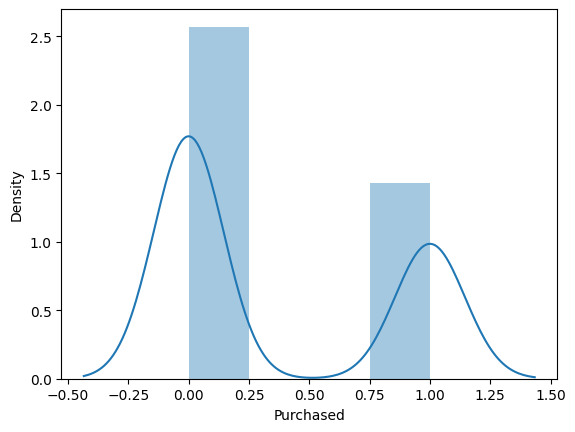

In [ ]:
#distplot
sns.distplot(df.Purchased)

In [ ]:
df.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.490000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,0.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


<Axes: >

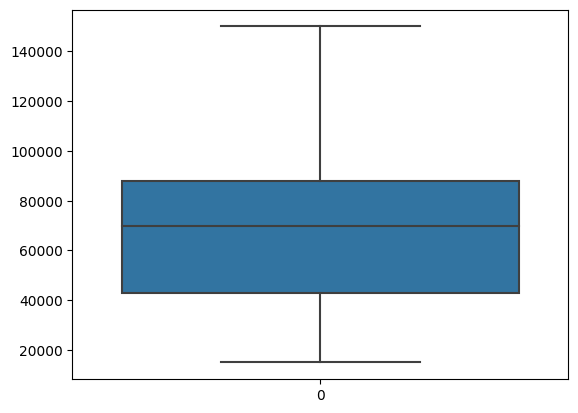

In [ ]:
#checking outliers
sns.boxplot(df.EstimatedSalary)

<Axes: >

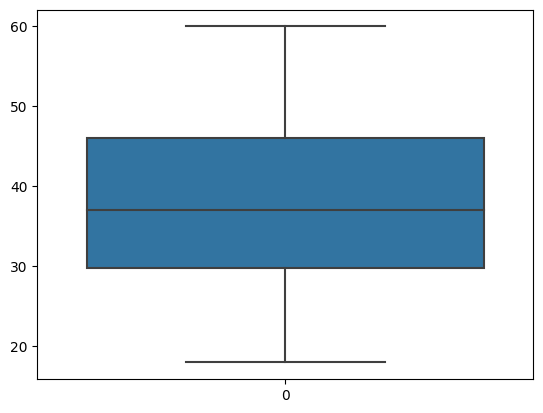

In [ ]:
sns.boxplot(df.Age)

In [ ]:
df.corr()

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,-0.060435,0.155238,1.000000,0.362083
Purchased,-0.042469,0.622454,0.362083,1.000000


<Axes: >

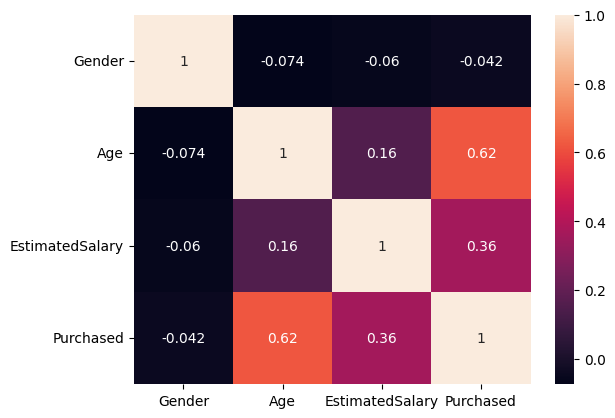

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.corr().Purchased.sort_values(ascending=False) #with target column

Purchased          1.000000
Age                0.622454
EstimatedSalary    0.362083
Gender            -0.042469
Name: Purchased, dtype: float64

In [ ]:
#x and y split
x=df.drop(columns=['Purchased'],axis=1)
x.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [ ]:
y=df.Purchased
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [ ]:
#scaling the independent variable
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [ ]:
x_scaled=pd.DataFrame(scale.fit_transform(x),columns=x.columns)
x_scaled.head()

,Gender,Age,EstimatedSalary
0,1.0,0.023810,0.029630
1,1.0,0.404762,0.037037
2,0.0,0.190476,0.207407
3,0.0,0.214286,0.311111
4,1.0,0.023810,0.451852


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=0)

In [ ]:
x_train.shape

(320, 3)

In [ ]:
x_test.shape

(80, 3)

In [ ]:
#model building(logistis analysis)
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
pred=model.predict(x_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
#with random values
model.predict([[1,35,75000]]) #we get 1 which means purchased

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

#evaluation of classifiaction model

In [ ]:
#1)Accuracy score (not suggested)
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_auc_score,roc_curve
accuracy_score(y_test,pred)

0.925

In [ ]:
#confusion matrix
confusion_matrix(y_test,pred)

array([[58,  0],
       [ 6, 16]])

In [ ]:
pd.crosstab(y_test,pred) #suggested

col_0,0,1
Purchased,,
0,58,0
1,6,16


In [ ]:
#here a11 a12 a21 a22 have names as: true -ve,false +ve,false -ve,true +ve

In [ ]:
(58+16)/80 #checking accuracy score


0.925

In [ ]:
#classification report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        58
           1       1.00      0.73      0.84        22

    accuracy                           0.93        80
   macro avg       0.95      0.86      0.90        80
weighted avg       0.93      0.93      0.92        80



In [ ]:
#precision = out of all predictions how many are correctly predicted (58/(58+6))
#recall =  out of all actual cases how many are correctly predicted  (58/(58+0))
#f1-score =2*precision*recall/(precision+recall)

#ROC-AUC score

In [ ]:
#ROC(receiver operating characterristics) -AUC(area under the curve) score
#AUC lies b/w 0 and 1(box)
probability  = model.predict_proba(x_test)[:,1] #for 1s
probability


array([0.2144872 , 0.25275401, 0.27923866, 0.18905548, 0.19283512,
       0.05077814, 0.07141131, 0.61971028, 0.04489232, 0.45763683,
       0.11656137, 0.10458125, 0.2498842 , 0.39023091, 0.07753816,
       0.3782384 , 0.33667398, 0.06841339, 0.91815959, 0.12317974,
       0.18405501, 0.8529991 , 0.32802683, 0.73435186, 0.03755646,
       0.87354905, 0.17728525, 0.1753795 , 0.27483994, 0.25154865,
       0.08930984, 0.34527554, 0.78827655, 0.24277786, 0.07252234,
       0.03360677, 0.08785064, 0.15688678, 0.0996113 , 0.48076385,
       0.16428821, 0.33335936, 0.15340067, 0.11910455, 0.66423454,
       0.09922975, 0.34848964, 0.7865558 , 0.05454283, 0.70785041,
       0.92388136, 0.11649016, 0.21455017, 0.42591222, 0.88868144,
       0.35155547, 0.18309699, 0.13003618, 0.44394933, 0.03255284,
       0.08417465, 0.78880947, 0.05821796, 0.40782162, 0.02307795,
       0.89114604, 0.12344655, 0.09967335, 0.28809901, 0.44088787,
       0.5335957 , 0.28599525, 0.06358761, 0.30925421, 0.16693

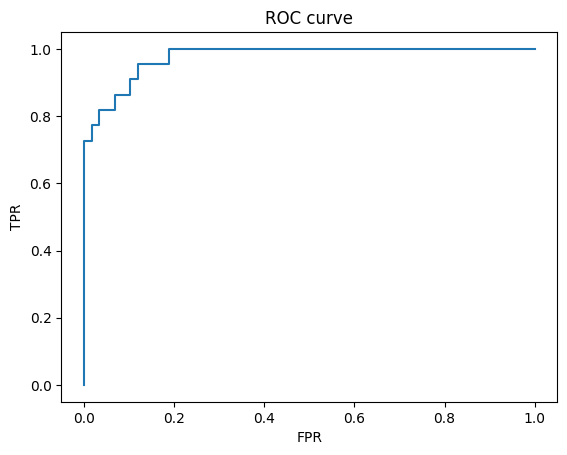

In [ ]:
#roc curve
fpr,tpr,threshsholds=roc_curve(y_test,probability)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [ ]:
roc_auc_score(y_test,probability) #AUC score

0.975705329153605